# Neural Networks for Classification, and Clustering

In this notebook we are going to explore the use of Neural Networks for image classification. We are going to use a dataset of small images of clothes and accessories, the Fashion MNIST. You can find more information regarding the dataset here: https://pravarmahajan.github.io/fashion/

Each instance in the dataset consist of an image, in a format similar to the digit images you have seen in the previous homework, and a label. The labels correspond to the type of clothing, as follows:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Let's first load the required packages.

In [1]:
#load the required packages

%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

The following is a function to load the data, that we are going to use later in the notebook.

In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_fashion_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

## TO DO 0
Place your ID ("numero di matricola") that will be used as seed for random generator. Change the ID number in case you observe unexpected behaviours and want to test if this is due to randomization (e.g., train/test split). If you change the ID number explain why you have change it.

In [3]:
ID = 2053080
np.random.seed(ID)

Now we load the dataset using the function above.

In [4]:
#load the fashion MNIST dataset and normalize the features so that each value is in [0,1]
X, y = load_fashion_mnist("data")
# rescale the data
X = X / 255.0

Now we split the data into training and test. Make sure that each label is present at least 10 times
in the training set.

In [5]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rest as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [47 44 46 61 52 49 53 52 43 53]


The following function plots an image and the corresponding label, to be used to inspect the data when needed.

In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

Now let's test the function above and check few images.

INPUT:


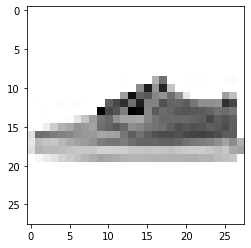

LABEL: 7
INPUT:


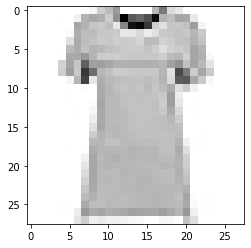

LABEL: 0
INPUT:


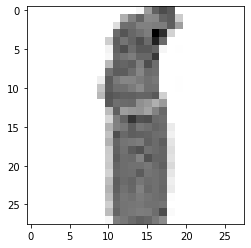

LABEL: 3


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,300)

## TO DO 1

Now use a (feed-forward) Neural Network for prediction. Use the multi-layer perceptron (MLP) classifier MLPClassifier(...) in scikit-learn, with the following parameters: max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization parameter for L2 regularization that is used by the MLP in sklearn.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 100. You can evaluate the architectures you chose using the GridSearchCV with a 5-fold cross-validation, and use the results to pick the best architecture. The code below provides some architectures you can use, but you can choose other ones if you prefer.


In [8]:
#MLPclassifier requires in input the parameter hidden_layer_sizes, that is a tuple specifying the number of 
#neurons in the hidden layers; for example: (10,) means that there is only 1 hidden layer with 10 neurons; 
#(10,50) means that there are 2 hidden layers, the first with 10 neurons, the second with 50 neurons

#these are examples of possible architectures you can test, but feel free to use different architectures!
# hl_parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]}
hl_parameters = {'hidden_layer_sizes': [(20,), (50,), (80,), (20,20,), (50,50,)]}

mlp_cv = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID)
mlp_GS = GridSearchCV(mlp_cv, param_grid=hl_parameters, cv=5, verbose=True)
mlp_GS.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(mlp_GS.best_params_)

print("Score with best parameters:")
print(mlp_GS.best_score_)

print("\nAll scores on the grid:")
print(mlp_GS.cv_results_['mean_test_score'])

Fitting 5 folds for each of 5 candidates, totalling 25 fits
RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (80,)}
Score with best parameters:
0.768

All scores on the grid:
[0.732 0.748 0.768 0.604 0.744]


## TO DO 2

What do you observe for different architectures and their scores? How do the number of layers and their sizes affect the performances?

**ANSWER**: The best neural network found is the one with 1 hidden layer with 80 neurons. I observe that scores don't increase or decrease in a monotonic way depending on the number of layers and neurons. Number of layers and their sizes affect the performances in a way that we need the right complexity of the neural network, suitable for the problem, with not too many and not too few layers and neurons.

## TO DO 3

Now get training and test error (according to the initial split) for a NN with best parameters chosen from the cross-validation above (and learning the NN weights from the entire training set). Use verbose=True
in input so to see how loss changes in iterations. (Note that the loss used by the MLPclassifier may be different from the 0-1 loss, also called *accuracy*.)

In [9]:
#get training and test error for the best NN model from CV

mlp = mlp_GS.best_estimator_
mlp.fit(X_train, y_train)

training_error = 1. - mlp.score(X_train,y_train)

test_error = 1. - mlp.score(X_test,y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.224672


## More data 
Now let's do the same but using 10000 (or less if it takes too long on your machine) data points for training. Use the same NN architectures as before, but you can try more if you want!

In [10]:
X = X[permutation]
y = y[permutation]

m_training = 10000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts=True)

Labels and frequencies in training dataset: 


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1019, 1001, 1018, 1027, 1020, 1028, 1001,  927,  961,  998],
       dtype=int64))

## TO DO 4

Now train the NNs with the added data points. Feel free to try more different architectures than before if you want, or less if it takes too much time. You can use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [11]:
#for NN we try the same architectures as before
# hl_parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]}
# hl_parameters = {'hidden_layer_sizes': [(50,), (75,), (100,), (75,75,), (100,100,)]}
hl_parameters = {'hidden_layer_sizes': [(20,), (50,), (80,), (20,20,), (50,50,)]}

mlp_large_cv = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID)
mlp_GS_2 = GridSearchCV(mlp_large_cv, param_grid=hl_parameters, cv=5, verbose=True)
mlp_GS_2.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(mlp_GS_2.best_params_)

print("Score with best parameters:")
print(mlp_GS_2.best_score_)

print("\nAll scores on the grid:")
print(mlp_GS_2.cv_results_['mean_test_score'])

Fitting 5 folds for each of 5 candidates, totalling 25 fits
RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (80,)}
Score with best parameters:
0.8513999999999999

All scores on the grid:
[0.8107 0.8362 0.8514 0.8213 0.8477]


## TO DO 5
Describe your architecture choices and the results you observe with respect to the architectures you used.

**ANSWER**: I keep the same hidden layer sizes as before because they gave me a good rate between good scores and time computing (with 3 layers it was taking too long). All scores have increased by a lot and especially the NN with size (20,20) increased by more than 0.2 from previous score. That's because using so much more samples on training data permit NN's to perform better, especially for the more complex ones.

## TO DO 6

Get the train and test error for the best NN you obtained with 10000 points. This time you can run for 100 iterations if you cannot run for 300 iterations. 


In [12]:
#get training and test error for the best NN model from CV

best_mlp_large = mlp_GS_2.best_estimator_
best_mlp_large.fit(X_train, y_train)

training_error = 1. - best_mlp_large.score(X_train,y_train)

test_error = 1. - best_mlp_large.score(X_test,y_test)

print ('RESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.141080


## TO DO 7

Compare the train and test error you got with a large number of samples with the best one you obtained with only 500 data points. Are the architectures the same or do they differ? What about the errors you get?

**ANSWER**: The architectures are the same on both cases but the test error achieved using more samples to train the NN's is lower than the first one. This is because using more samples on training data makes the NN to be more accurate on predictions. Training error, instead, didn't change and it remains equal to zero.

## TO DO 8

Plot an image that was missclassified by NN with m=500 training data points and it is now instead correctly classified by NN with m=10000 training data points.

INPUT:


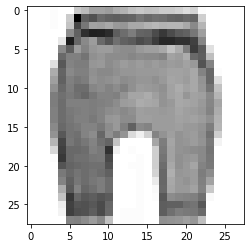

LABEL: 1


In [13]:
# predicted values using best NN estimator found using 500 training samples
y_predicted_1 = mlp.predict(X)
# predicted values using best NN estimator found using 10000 training samples
y_predicted_2 = best_mlp_large.predict(X)

for i in range(X.shape[0]):
    # search of a value that is correctly classified by the 2nd NN estimator
    # and not correctly classified by the 1st NN estimator
    if y_predicted_1[i] != y[i] and y_predicted_2[i] == y[i]:
        plot_input(X, y, i)
        break

Let's plot some of the weigths of the multi-layer perceptron classifier, for the best NN we get with 500 data points and with 10000 data points. The code below plots the weights in a matrix form, where a figure represents all the weights of the edges entering in a hidden node. Notice that the code assumes that the NNs are called "mlp" and "best_mlp_large": you may need to replace such variables with your variable names. 



Weights with 500 data points:


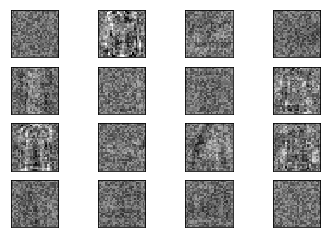

Weights with 10000 data points:


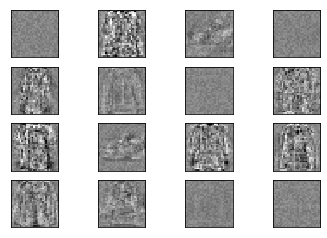

In [14]:
print("Weights with 500 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 10000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_mlp_large.coefs_[0].min(), best_mlp_large.coefs_[0].max()
for coef, ax in zip(best_mlp_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## TO DO 9

Describe what do you observe by looking at the weights.

**ANSWER**: I observe that weights with 10000 data points are more precise and accurate than ones with 500 data points. This because I can see that images for the representation of weights are more detailed in the case with 10000 data points.

## TO DO 10

Pick another classifier among the ones we have seen previously (SVM or something else). Report the training and test error for such classifier with 10000 samples in the training set, if possible; if the classifier cannot run with so many data sample reduce the number of samples.

*Note*: if there are parameters to be optimized use cross-validation. If you choose SVM, you can decide if you want to use a single kernel or use the best among many; in the latter case, you need to pick the best kernel using cross-validation (using the functions available in sklearn).

**[I use SVM with kernel='rbf', C=10, gamma=0.01 (parameters already set at the best valus previously found)]**

In [18]:
#import SVC
from sklearn.svm import SVC

#run SVM with rbf kernel
svm_GS_3 = SVC(kernel='rbf', C=10, gamma=0.01)
svm_GS_3.fit(X_train, y_train)

training_error_other = 1. - svm_GS_3.score(X_train,y_train)

test_error_other = 1. -  svm_GS_3.score(X_test,y_test)

print ('RESULTS FOR OTHER CLASSIFIER\n')

print ("Best training error (other model): %f" % training_error_other)
print ("Best test error (other model): %f" % test_error_other)

RESULTS FOR OTHER CLASSIFIER

Best training error (other model): 0.017400
Best test error (other model): 0.123020


## TO DO 11
Compare the results of NN and of the other classifier you have chosen above. Which classifier would you preferer? Provide a brief explanation.

**ANSWER**: Based on data I got, I would preferer the SVM classifier because it gives me a better test error. Considering that SVM takes more time to find best paramteters and to train the classifier I would prefer NN classifier if I need a lower computational complexity with still a very good score.

# Clustering with K-means

Clustering is a useful technique for *unsupervised* learning. We are now going to cluster 2000 images in the fashion MNIST dataset, and try to understand if the clusters we obtain correspond to the true labels.

In [19]:
#load the required packages

from sklearn import metrics
from sklearn.cluster import KMeans

(Note that the code below assumes that the data has already been transformed as in the NN part of the notebook, so make sure to run the code for the transformation even if you do not complete the part on NN.)

In [20]:
#let's consider only 2000 data points

X = X[permutation]
y = y[permutation]

m_training = 2000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

## TO DO 1
Cluster the points using the KMeans() and fit() functions (see the userguide for details). For Kmeans, set: n_clusters=10 as number of clusters; n_init=10 as the number of times the algorithm will be run with different centroid seeds; random_state = ID. You can use the default setting for the other parameters.

In [21]:
kmeans = KMeans(n_clusters=10, n_init=10, random_state=ID)
kmeans.fit(X_train)

KMeans(n_clusters=10, random_state=2053080)

## Comparison of clusters with true labels

## TO DO 2
Now compare the obtained clusters with the true labels, using the function sklearn.metrics.cluster.contingency_matrix() (see the userguide for details). The function prints a matrix $A$ such that entry $A_{i,j}$ is is the number of samples in true class $i$ and in predicted class $j$.

In [22]:
# compute and print the contingency matrix for the true labels vs the clustering assignments
print(sklearn.metrics.cluster.contingency_matrix(y,kmeans.predict(X)))

[[  84 3531   35  171   95 1913   25  144    0    2]
 [  10  245    0 5234   67  418    3   23    0    0]
 [ 133  103   30    7 2322 1490   32 1882    0    1]
 [  29 1658   19 2998   70 1203    3   19    1    0]
 [  64  815   29  140 2861  805   15 1271    0    0]
 [4293    2   15    2    0   70    7    0  419 1192]
 [ 191 1106   26   46 1417 2098   68 1042    1    5]
 [ 803    0    0    0    0    1    3    0  283 4910]
 [ 351   24 2433   10   54  351 2221  255   10  291]
 [ 269    5    3    3   13   43    5    2 5018  639]]


## TO DO 3
Based on the matrix shown above, comment on the results of clustering in terms of adherence to the true labels.

**ANSWER**: In the contingency matrix all well predicted true labels are in the diagonal of the matrix, so all other numbers in the matrix have to be as low possible to have a good prediction. Therefore, from the resulting matrix we can tell that several points aren't well predicted compared to true labels.

## Choice of k with silhoutte coefficient
In many real applications it is unclear what is the correct value of $k$ to use. In practice one tries different values of $k$ and then uses some external score to choose a value of $k$. One such score is the silhoutte coefficient, that can be computed with metrics.silhouette_score(). See the definition of the silhoutte coefficient in the userguide.

## TO DO 4
Compute the clustering for k=2,3,...,15 (other parameters as above) and print the silhoutte coefficient for each such clustering.

In [23]:
#run k-means with 10 choices of initial centroids for a range of values of n_clusters

for k in range(2,16): # for each k value
    
    # current clustering computation
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=ID)
    kmeans.fit(X_train)
    
    # silhouette score of current clustering
    silhouttescore = metrics.silhouette_score(X, kmeans.predict(X))
    print("Silhoutte coefficient for number of clusters="+str(k)+": "+str(silhouttescore))

Silhoutte coefficient for number of clusters=2: 0.19254167734878766
Silhoutte coefficient for number of clusters=3: 0.17794437242092997
Silhoutte coefficient for number of clusters=4: 0.1799876123871839
Silhoutte coefficient for number of clusters=5: 0.15456466377540382
Silhoutte coefficient for number of clusters=6: 0.15611617101891803
Silhoutte coefficient for number of clusters=7: 0.16663016316416074
Silhoutte coefficient for number of clusters=8: 0.1613942941480942
Silhoutte coefficient for number of clusters=9: 0.15243636881493372
Silhoutte coefficient for number of clusters=10: 0.13844844052270644
Silhoutte coefficient for number of clusters=11: 0.14231516360480878
Silhoutte coefficient for number of clusters=12: 0.1405627868912275
Silhoutte coefficient for number of clusters=13: 0.1303905490650708
Silhoutte coefficient for number of clusters=14: 0.12735449933166373
Silhoutte coefficient for number of clusters=15: 0.1275321252424394


## TO DO 5

Based on the silhoutte score, which $k$ would you pick? Motivate your choice. Does your choice match what you know about the data? If yes, explain why you think this is the case; if no, explain what you think may be the reason.

**ANSWER**: I would pick k = 2 because the best (higher) silhouette score found is the one with k = 2. My choice doesn't match what I know about the data because our data is divided in 10 labels and I would have expected that the best silhouette score would be the one with k = 10, having so that number of cluster matches number of labels of our data.